# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

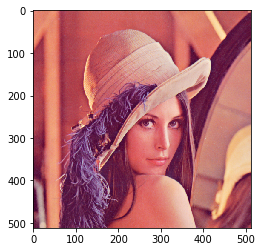

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lena.png')
# img_new = np.zeros(512*512*3, dtype = 'uint8').reshape(512, 512, 3)
# img_new[:, :, 0] = img[:, :, 2].copy()
# img_new[:, :, 1] = img[:, :, 1].copy()
# img_new[:, :, 2] = img[:, :, 0].copy()
img = img[:,:,::-1]
plt.imshow(img)
plt.show()

## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

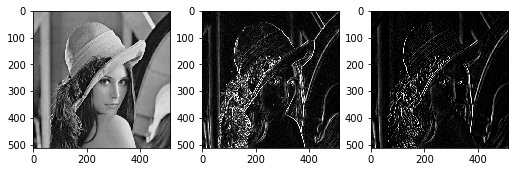

In [2]:
# 轉為灰階圖片
img_grey = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
# img_grey = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, 1, 0)

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = cv2.Sobel(img_grey, -1, 1, 0)

#　組合 + 顯示圖片
fig = plt.figure(figsize=(60,60))
ax1 = fig.add_subplot(20,20,1)
ax1.imshow(img_grey, cmap = 'gray')
ax2 = fig.add_subplot(20,20,2)
ax2.imshow(img_sobel_x, cmap = 'gray')
ax3 = fig.add_subplot(20,20,3)
ax3.imshow(img_sobel_x_uint8, cmap = 'gray')
plt.show()

# cv2.imshow('grey', img_grey)
# cv2.imshow('x-sobel', img_sobel_x)
# cv2.imshow('uint8-sobel', img_sobel_x_uint8)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### 比較一次與兩次計算偏微分的結果

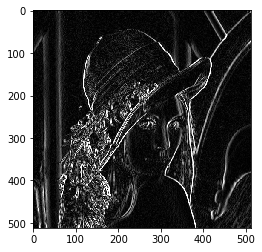

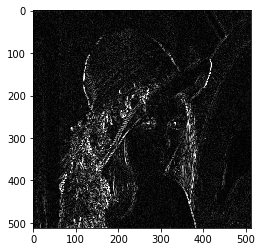

In [6]:
img_grey = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# 求一次導數取得邊緣檢測結果
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, 1, 0)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 求二次導數取得邊緣檢測結果
img_sobel_xx = cv2.Sobel(img_grey, cv2.CV_16S, 2, 0)
img_sobel_xx = cv2.convertScaleAbs(img_sobel_xx)



#　組合 + 顯示圖片
# fig = plt.figure(figsize=(80,80))
# ax1 = fig.add_subplot(40,40,1)
# ax1.imshow(img_sobel_x, cmap = 'gray')
# ax2 = fig.add_subplot(40,40,2)
# ax2.imshow(img_sobel_xx, cmap = 'gray')
# plt.show()

plt.imshow(img_sobel_x, cmap = 'gray')
plt.show()
plt.imshow(img_sobel_xx, cmap = 'gray')
plt.show()
# img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
# while True:
#     cv2.imshow('Edge Detection', img_show)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

